In [2]:
import ROOT
import numpy as np
import pandas as pd 
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter

ROOT.gROOT.ProcessLine( "gErrorIgnoreLevel = kError;");
ROOT.gStyle.SetCanvasDefW(2400);
ROOT.gStyle.SetCanvasDefH(900);
ROOT.gStyle.SetLegendTextSize(0.05)
ROOT.gStyle.SetLabelSize(0.05)
ROOT.gStyle.SetMarkerSize(1)
ROOT.gStyle.SetMarkerStyle(8)
ROOT.gStyle.SetLineWidth(2)
ROOT.gStyle.SetTickLength(0.02, "y")

plt.rcParams.update({
    'axes.labelsize': 15
})

In [3]:
def convert_to_type(df, col, type):
    df[col] =  df[col].apply(lambda s: type(s))

In [28]:
def normalize_df(df, cols, norm):
    for col in cols:
        df[col] = df[col].div(df[norm])

# Benchmarks
Plot benchmark results from running histond_benchmark.C with timers within TH1

## No Bulk API

### Fixed Bins

In [29]:
filename = "nonbulk_1d_fixedbins.csv" 
df_bm = pd.read_csv(filename)
df_bm["nvals"] =  df_bm["input"].apply(lambda s: float(s.split("_")[-1].split(".")[0]))
df_bm["distribution"] =  df_bm["input"].apply(lambda s: s.split("_")[1])
convert_to_double(df_bm, "tfindbin")
convert_to_double(df_bm, "tfill")
convert_to_double(df_bm, "tstats")
del df_bm["input"]
df_bm.head(7)

NameError: name 'convert_to_double' is not defined

In [ ]:
gp_bm = df_bm.groupby(["env", "distribution", "nvals", "nbins", "bulksize"])
gp_bm.mean()

In [ ]:
unique_nbins = df_bm["nbins"].unique().astype(np.float64)
unique_nvals = df_bm["nvals"].unique().astype(np.float64)
# unique_nvals = [500000000]
unique_bulksize = df_bm["bulksize"].unique().astype(np.float64)
unique_nbins, unique_nvals, unique_bulksize

Plots the total time spent on finding bins, filling bins, and updating stats for **1D** histograms with **fixed bins**, **different** number of bins and **different** number of **doubles**. Total time averaged over **3 runs**

In [ ]:
plt.figure(figsize=(20,10))
plt.suptitle("Fixed Bins")

def plot_perval(title, col, xlabel, ylabel, ylim, norm=1):
    plt.title(title)
    for nv in unique_nvals:
        plt.errorbar(unique_nbins, gp_bm.mean().loc["CPU", "uniform", 500000000, :, 1][col], yerr=gp_bm.std().loc["CPU", "uniform", 500000000, :, 1][col], marker="o", ecolor="k", label=f"{int(nv)}")
    plt.xlabel(xlabel)
    plt.ylim(ylim)
    plt.ylabel(ylabel)

def plot_perbin(title, col, xlabel, ylabel, ylim, norm=1):
    plt.title(title)
    for nb in unique_nbins:
        plt.errorbar(unique_nvals, gp_bm.mean().loc["CPU", "uniform", :, nb, 1][col], yerr=gp_bm.std().loc["CPU", "uniform", :, nb, 1][col], marker="o", ecolor="k", label=f"{int(nb)}")
    plt.xlabel("Number of values")
    plt.ylim(ylim)
    plt.ylabel(ylabel)

ylim=[0,100]
plt.subplot(231)
plot_perval("FindBin", "tfindbin", "Number of bins",  "Total time (s)", ylim)

plt.subplot(232)
plot_perval("Fill", "tfill", "Number of bins",  "Total time (s)", ylim)

plt.subplot(233)
plot_perval("Update Stats", "tstats", "Number of bins",  "Total time (s)", ylim)
plt.legend(title="Number of bins", loc='center left', bbox_to_anchor=(1, 0.5))

ylim = [0, 100]
plt.subplot(234)
plot_perbin("", "tfindbin", "Number of values",  "Total time (s)", ylim)

plt.subplot(235)
plot_perbin("", "tfill", "Number of values",  "Total time (s)", ylim)

plt.subplot(236)
plot_perbin("", "tstats", "Number of values",  "Total time (s)", ylim)
plt.legend(title="Number of bins", loc='center left', bbox_to_anchor=(1, 0.5))

Plots the *average* time spent *per value* on finding bins, filling bins, and updating stats for **1D** histograms with **fixed bins**, **different** number of bins and **different** number of **doubles**. Total time averaged over **3 runs**

In [ ]:
plt.figure(figsize=(20,10))
plt.suptitle("Fixed Bins")

def plot_perval_normalized(title, col, xlabel, ylabel, ylim, norm=1):
    plt.title(title)
    for nv in unique_nvals:
        plt.errorbar(unique_nbins, gp_bm.mean().loc["CPU", "uniform", nv, :, 1][col]/nv/norm, yerr=gp_bm.std().loc["CPU", "uniform", nv, :, 1][col]/nv/norm, marker="o", ecolor="k", label=f"{int(nv)}")
    plt.xlabel(xlabel)
    plt.ylim(ylim)
    plt.ylabel(ylabel)

def plot_perbin_normalized(title, col, xlabel, ylabel, ylim, norm=1):
    plt.title(title)
    for nb in unique_nbins:
        plt.errorbar(unique_nvals, gp_bm.mean().loc["CPU", "uniform", :, nb, 1][col]/unique_nvals/norm, yerr=gp_bm.std().loc["CPU", "uniform", :, nb, 1][col]/unique_nvals/norm, marker="o", ecolor="k", label=f"{int(nb)}")
    plt.xlabel("Number of values")
    plt.ylim(ylim)
    plt.ylabel("Average time per value (s)")

norm = 1e-9
ylim = [13, 20]
plt.subplot(231)
plot_perval_normalized("FindBin", "tfindbin", "Number of bins",  "Average time per value (ns)", ylim, norm)

plt.subplot(232)
plot_perval_normalized("Fill", "tfill", "Number of bins",  "Average time per value (ns)", ylim, norm)

plt.subplot(233)
plot_perval_normalized("Update Stats", "tstats", "Number of bins",  "Average time per value (ns)", ylim, norm)
plt.legend(title="Number of values", loc='center left', bbox_to_anchor=(1, 0.5))

ylim = [13, 20]
plt.subplot(234)
plot_perbin_normalized("", "tfindbin", "Number of values",  "Average time per value (ns)", ylim, norm)

plt.subplot(235)
plot_perbin_normalized("", "tfill", "Number of values",  "Average time per value (ns)", ylim, norm)

plt.subplot(236)
plot_perbin_normalized("", "tstats", "Number of values",  "Average time per value (ns)", ylim, norm)
plt.legend(title="Number of bins", loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#### root plot

In [ ]:
def setAxes(g, xtitle="", ytitle=""):
    xaxis = g.GetXaxis()
    xaxis.SetTitle(xtitle)
    # xaxis.SetTitleOffset(3)
    xaxis.SetTitleSize(0.05)
    xaxis.SetTickSize(0)
    xaxis.SetLabelSize(0.05)
    xaxis.LabelsOption("vM")
    xaxis.SetRangeUser(0, 200)
    
    yaxis = g.GetYaxis()
    yaxis.SetTitle(ytitle)
    yaxis.SetTitleSize(0.05)
    yaxis.SetLabelSize(0.05)
    yaxis.SetRangeUser(0, 40)
    
w = 1600
h = 900
c = ROOT.TCanvas("c1", "")
# c.SetRightMargin(0.36)
# c.SetBottomMargin(0.33)
c.Divide(2,1)
l = ROOT.TLegend(0.65, 0.7, 0.92, 0.9)
l.SetTextSize(0.05)

title="Benchmarks"
c.cd(1)
mg = ROOT.TMultiGraph("mg", title)
for nv in unique_nvals:
    # g = ROOT.TGraphErrors(len(unique_nbins), unique_nbins, gp_bm.mean().loc["CPU", "uniform", nv, :, 1]["tfindbin"].values, ROOT.nullptr, gp_bm.std().loc["CPU", "uniform", nv, :, 1]["tfindbin"].values)
    g = ROOT.TGraphErrors(len(unique_nbins), unique_nbins, gp_bm.mean().loc["CPU", "uniform", nv, :, 1]["tfindbin"].values)
    g.SetMarkerSize(1)
    g.SetMarkerStyle(20)
    mg.Add(g, "PL")
    l.AddEntry(g, str(nv), "p")
mg.Draw("A")

c.cd(2)
mg = ROOT.TMultiGraph("mg", title)
for nv in unique_nvals:
    # g = ROOT.TGraphErrors(len(unique_nbins), unique_nbins, gp_bm.mean().loc["CPU", "uniform", nv, :, 1]["tfindbin"].values, ROOT.nullptr, gp_bm.std().loc["CPU", "uniform", nv, :, 1]["tfindbin"].values)
    g = ROOT.TGraphErrors(len(unique_nbins), unique_nbins, gp_bm.mean().loc["CPU", "uniform", nv, :, 1]["tfindbin"].values)
    g.SetMarkerSize(1)
    g.SetMarkerStyle(20)
    mg.Add(g, "PL")
    l.AddEntry(g, str(nv), "p")
mg.Draw("A")

# l.Draw()
c.cd()
c.Draw()

### Variable Bins

In [ ]:
filename = "nonbulk_1d_varbins.csv" 
df_bm = pd.read_csv(filename)
df_bm["nvals"] =  df_bm["input"].apply(lambda s: float(s.split("_")[-1].split(".")[0]))
df_bm["distribution"] =  df_bm["input"].apply(lambda s: s.split("_")[1])
convert_to_double(df_bm, "tfindbin")
convert_to_double(df_bm, "tfill")
convert_to_double(df_bm, "tstats")
del df_bm["input"]
df_bm.head(7)

In [ ]:
gp_bm = df_bm.groupby(["env", "distribution", "nvals", "nbins", "bulksize"])
gp_bm.mean()

In [ ]:
unique_nbins = df_bm["nbins"].unique().astype(np.float64)
unique_nvals = df_bm["nvals"].unique().astype(np.float64)
unique_bulksize = df_bm["bulksize"].unique().astype(np.float64)
unique_nbins, unique_nvals, unique_bulksize

Plots the *average* time spent *per value* on finding bins, filling bins, and updating stats for **1D** histograms with **fixed bins**, **different** number of bins and **0.5B** number of **doubles**. Total time averaged over **3 runs**

In [ ]:
plt.figure(figsize=(20,5))
plt.suptitle("Variable Bins")

norm=1
ylim = [0*1e-8, 5.5*1e-8]
plt.subplot(131)
plot_perval_normalized("FindBin", "tfindbin", "Number of bins",  "Average time per value (ns)", ylim, norm)

plt.subplot(132)
plot_perval_normalized("Fill", "tfill", "Number of bins",  "Average time per value (ns)", ylim, norm)

plt.subplot(133)
plot_perval_normalized("Update Stats", "tstats", "Number of bins",  "Average time per value (ns)", ylim, norm)
plt.legend(title="Number of bins", loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [ ]:
def convert_to_double_list(df, col):
    df[col] =  df[col].apply(lambda s: [np.float64(x) for x in s.split()])
    
filename = "nonbulk_1d_pervarbin.csv" 
df_bm = pd.read_csv(filename)
df_bm["nvals"] =  df_bm["input"].apply(lambda s: float(s.split("_")[-1].split(".")[0]))
df_bm["distribution"] =  df_bm["input"].apply(lambda s: s.split("_")[1])
convert_to_double_list(df_bm, "tfindbin")
convert_to_double_list(df_bm, "tfill")
convert_to_double(df_bm, "tstats")
del df_bm["input"]
df_bm.head(7)

Plots the *average* time spent on finding a specific bin in an array with **100** bins for **0.5B** number of **doubles**. Total time averaged over **3 runs**

In [ ]:
# w = 2400
# h = 900
# c = ROOT.TCanvas("c1", title, w, h)
# c.SetRightMargin(0.32)
# c.SetBottomMargin(0.33)
# c.Divide(2,1)

# l = ROOT.TLegend(0.7, 0.7, 0.96, 0.9)
# l.SetTextSize(0.05)

# g = ROOT.TGraph(100, np.arange(100, dtype=np.float64), gp_bm.agg(mean_list).loc["CPU", "uniform", 500000000, 100, 1]["tfindbin"][1:-1])
# g.SetMarkerSize(1)
# g.SetMarkerStyle(8)
# l.AddEntry(g, "Microbenchmark", "p")
# xaxis = g.GetXaxis()
# xaxis.SetTitle("Bin")
# yaxis = g.GetYaxis()
# yaxis.SetTitle(f"Time (ns)")
# xaxis.SetRangeUser(0, 100)

# c.cd(1)
# g.Draw("ALP")

# title="Time to find bin in an array with 100 bins"
# g.SetTitle(title)

# l.Draw()
# c.Draw()

Investigate caching within Histogram Filling

## With Bulk API

### Fixed Bins

In [ ]:
filename = "bulk_1d_fixedbins.csv" 
df_bm = pd.read_csv(filename)
df_bm["nvals"] =  df_bm["input"].apply(lambda s: float(s.split("_")[-1].split(".")[0]))
df_bm["distribution"] =  df_bm["input"].apply(lambda s: s.split("_")[1])
del df_bm["input"]
df_bm.head(7)

In [ ]:
gp_bm = df_bm.groupby(["env", "distribution", "nvals", "nbins", "bulksize"])
gp_bm.mean()

In [ ]:
unique_nbins = df_bm["nbins"].unique().astype(np.float64)
unique_nvals = df_bm["nvals"].unique().astype(np.float64)
unique_bulksize = df_bm["bulksize"].unique().astype(np.float64)
unique_nbins, unique_nvals, unique_bulksize

In [ ]:
def plot_perbulk_normalized(title, col, xlabel, ylabel, xlim, ylim, norm=1):
    plt.title(title)
    for bs in unique_bulksize:
        plt.errorbar(unique_nbins, gp_bm.mean().loc["CPU", "uniform", 5e8, :, bs][col]/norm, 
                     yerr=gp_bm.std().loc["CPU", "uniform", 5e8, :, bs][col]/norm, marker="o", 
                     capsize=3, label=f"{int(bs)}")
    plt.xlabel(xlabel)
    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
    plt.ylabel(ylabel)

def plot_perbin_normalized(title, col, xlabel, ylabel, xlim, ylim, norm=1):
    plt.title(title)
    for nb in unique_nbins:
        plt.errorbar(unique_bulksize, gp_bm.mean().loc["CPU", "uniform", 5e8, nb, :][col]/norm, 
                     yerr=gp_bm.std().loc["CPU", "uniform", 5e8, nb, :][col]/norm, marker="o", 
                     capsize=3, label=f"{int(nb)}")
    plt.xlabel(xlabel)
    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
    plt.ylabel(ylabel)
    
plt.figure(figsize=(20,10))
plt.suptitle("Fixed Bins with Bulk API")

norm=unique_nvals*1e-9
xlim = []
ylim = [13, 20]
plt.subplot(231)
plot_perbulk_normalized("FindBin", "tfindbin", "Number of bins",  "Average time per value (ns)", xlim, ylim, norm)

plt.subplot(232)
plot_perbulk_normalized("Fill", "tfill", "Number of bins",  "Average time per value (ns)", xlim, ylim, norm)

plt.subplot(233)
plot_perbulk_normalized("Update Stats", "tstats", "Number of bins",  "Average time per value (ns)", xlim, ylim, norm)
plt.legend(title="Bulk size", loc='center left', bbox_to_anchor=(1, 0.5))

xlim = []
ylim = [13, 20]
plt.subplot(234)
plot_perbin_normalized("", "tfindbin", "Bulk size",  "Average time per value (ns)", xlim, ylim, norm)

plt.subplot(235)
plot_perbin_normalized("", "tfill", "Bulk size",  "Average time per value (ns)", xlim, ylim, norm)

plt.subplot(236)
plot_perbin_normalized("", "tstats", "Bulk size",  "Average time per value (ns)", xlim, ylim, norm)
plt.legend(title="Number of bins", loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Plot average total time. **Note that this timing includes overhead of timers for the measurements above**

In [ ]:
plt.figure(figsize=(10,5))
plt.suptitle("Fixed Bins")

norm=1
xlim = []
ylim = [0, 70]
plt.subplot(111)
plot_perbin_normalized("Total runtime on CPU with bulk API", "ttotal", "Bulk Size", "Total runtime (s)", xlim, ylim, norm)
plt.legend(title="Number of bins", loc='center left', bbox_to_anchor=(1, 0.5))

# Models

In [30]:
def f1_1(nbulks, bulksize, dim):
    T_d = 0
    T_u = 0
    T_RDF = 0 
    T_gb = 0
    T_mb = 0
    T_fb = 0
    T_usb = 0
    return T_d + T_u + T_RDF + np.sum([T_gb + T_mb + T_fb + T_usb for _ in range(nbulks)])

In [31]:
filename = "../das6-cpu-microbenchmark.result" 
with open(filename, "r") as f:
    jdata = json.load(f)
bm_df = pd.DataFrame.from_dict(jdata["benchmarks"]).astype({"real_time" : float})
bm_df["param"] = bm_df["name"].apply(lambda s: float(s.split("/")[1]))
bm_df["func_name"] = bm_df["name"].apply(lambda s: s.split("/")[0][3:])
bm_df.head(10)

,name,family_index,per_family_instance_index,run_name,run_type,repetitions,repetition_index,threads,iterations,real_time,cpu_time,time_unit,param,func_name
0,BM_UpdateStats/1/manual_time,0,0,BM_UpdateStats/1/manual_time,iteration,1,0,1,23315458,25.76925,79.62424,ns,1.0,UpdateStats


In [32]:
validation_results = "das6-cpu/20231127-223143" 
validation_df = pd.read_csv(validation_results)
validation_df["nvals"] =  validation_df["input"].apply(lambda s: float(s.split("_")[-1].split(".")[0]))
validation_df["distribution"] =  validation_df["input"].apply(lambda s: s.split("_")[1])
convert_to_type(validation_df, "tfindbin", np.float64)
convert_to_type(validation_df, "tfill", np.float64)
convert_to_type(validation_df, "tstats", np.float64)
convert_to_type(validation_df, "edges", np.bool_)
del validation_df["input"]
validation_df

,iter,env,nbins,bulksize,edges,tfindbin,tfill,tstats,ttotal,nvals,distribution
0,0,CPU,1,32768,False,1.560138,1.559809,1.508728,6.946656,5.000000e+07,uniform
1,0,CPU,1,32768,True,1.632608,1.547547,1.496084,6.973534,5.000000e+07,uniform
2,0,CPU,1,32768,False,2.922819,2.922721,2.826491,12.968031,1.000000e+08,uniform
3,0,CPU,1,32768,True,3.012858,2.855703,2.762142,12.829470,1.000000e+08,uniform
4,0,CPU,1,32768,False,13.832031,13.829804,13.373695,61.326527,5.000000e+08,uniform
...,...,...,...,...,...,...,...,...,...,...,...
435,4,CPU,1000,32768,True,3.389741,2.936729,2.839648,13.322180,1.000000e+08,constant-0.5
436,4,CPU,1000,32768,False,13.766692,13.766903,13.311516,60.370938,5.000000e+08,constant-0.5
437,4,CPU,1000,32768,True,15.975049,13.842183,13.385337,62.947642,5.000000e+08,constant-0.5
438,4,CPU,1000,32768,False,27.406678,27.406920,26.501789,120.329800,1.000000e+09,constant-0.5


In [33]:
gp_vd = validation_df.groupby(["env", "distribution", "nvals", "nbins", "bulksize", "edges"])
gp_vd.mean()

iter   tfindbin  \
env distribution nvals        nbins bulksize edges                    
CPU constant-0   5.000000e+07 1     32768    False   2.0   1.521431   
                                             True    2.0   1.604583   
                              10    32768    False   2.0   1.560703   
                                             True    2.0   1.651601   
                              100   32768    False   2.0   1.530562   
...                                                  ...        ...   
    uniform      1.000000e+09 10    32768    True    2.0  42.667152   
                              100   32768    False   2.0  27.481088   
                                             True    2.0  62.477031   
                              1000  32768    False   2.0  27.442950   
                                             True    2.0  82.399894   

                                                        tfill     tstats  \
env distribution nvals        nbins bulksize edges                         
CPU constant-0   5.000000e+07 1     32768    False   1.521439   1.471194   
                                             True    1.533369   1.482801   
                              10    32768    False   1.560905   1.509377   
                                             True    1.533977   1.483132   
                              100   32768    False   1.530594   1.480107   
...                                                       ...        ...   
    uniform      1.000000e+09 10    32768    True   27.449825  26.549458   
                              100   32768    False  27.495667  26.573666   
                                             True   27.392122  26.495989   
                              1000  32768    False  27.455260  26.537138   
                                             True   27.399802  26.481149   

                                                        ttotal  
env distribution nvals        nbins bulksize edges              
CPU constant-0   5.000000e+07 1     32768    False    6.755817  
                                             True     6.879267  
                              10    32768    False    6.931677  
                                             True     6.932276  
                              100   32768    False    6.795582  
...                                                        ...  
    uniform      1.000000e+09 10    32768    True   136.809829  
                              100   32768    False  121.844719  
                                             True   156.321105  
                              1000  32768    False  121.537791  
                                             True   176.372172  

[88 rows x 5 columns]

In [34]:
unique_nbins = validation_df["nbins"].unique().astype(np.float64)
unique_bulksize = validation_df["bulksize"].unique().astype(np.float64)
unique_edges = [True, False]
unique_nvals = validation_df["nvals"].unique().astype(np.float64)
unique_distribution = validation_df["distribution"].unique()
unique_nbins, unique_bulksize, unique_nvals, unique_edges, unique_distribution

(array([   1.,   10.,  100., 1000.]),
 array([32768.]),
 array([5.e+07, 1.e+08, 5.e+08, 1.e+09]),
 [True, False],
 array(['uniform', 'constant-0', 'constant-0.5'], dtype=object))

## Update Stats Bulk

In [35]:
usb_df = bm_df[bm_df["func_name"] == "UpdateStats"]
usb_df

,name,family_index,per_family_instance_index,run_name,run_type,repetitions,repetition_index,threads,iterations,real_time,cpu_time,time_unit,param,func_name
0,BM_UpdateStats/1/manual_time,0,0,BM_UpdateStats/1/manual_time,iteration,1,0,1,23315458,25.76925,79.62424,ns,1.0,UpdateStats


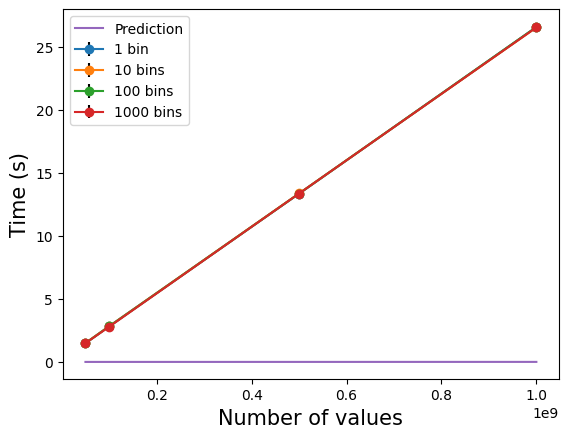

In [36]:
for nb in unique_nbins:
    plt.errorbar(unique_nvals, gp_vd.mean().loc["CPU", "uniform", :, nb, 32768, False]["tstats"], 
                 yerr=gp_vd.std().loc["CPU", "uniform", :, nb, 32768, False]["tstats"], 
                 marker="o", ecolor="k", label=f"{int(nb)} bin{'s' if int(nb) > 1 else ''}")

plt.plot(unique_nvals, np.repeat(usb_df["real_time"].values[0], 
                                 len(unique_nvals)) * (unique_nvals/1e4)/1e9, 
         label="Prediction")
plt.xlabel("Number of values")
plt.ylabel("Time (s)")
plt.legend()

### plot

In [37]:
def f_usb(x, p):
    """
    Update Stats
    """
    return p[0] + x[0] * p[1] + x[0] * (x[0]-1) / 2 * p[2]
    # return T_alg1_3 + dim * T_alg1_5_6 + dim * (dim-1) / 2 * T_alg1_8

w = 1600
h = 900
c = ROOT.TCanvas("c1", "", w, h)
c.SetRightMargin(0.36)
c.SetBottomMargin(0.33)
c.Divide(1, 3);

l = ROOT.TLegend(0.65, 0.7, 0.92, 0.9)
l.SetTextSize(0.05)

title="Calibration of T_{usb}"
mg = ROOT.TMultiGraph("mg", title)

g = ROOT.TGraph(len(usb_df["param"]), usb_df["param"].values, usb_df["real_time"].values)
g.SetMarkerSize(1)
g.SetMarkerStyle(20)
mg.Add(g, "P")
l.AddEntry(g, "Microbenchmark", "p")

model_usb = ROOT.TF1("f_usb", f_usb, 1, 200, 3)
fit = g.Fit(model_usb, "S")
l.AddEntry(model_usb, f"Fit")

xaxis = mg.GetXaxis()
xaxis.SetTitle("Dimension")
# xaxis.SetTitleOffset(3)
xaxis.SetTitleSize(0.05)
xaxis.SetTickSize(0)
xaxis.SetLabelSize(0.05)
xaxis.LabelsOption("vM")
xaxis.SetRangeUser(0, 10)

yaxis = mg.GetYaxis()
yaxis.SetTitle(f"Time ({usb_df['time_unit'][0]})")
yaxis.SetTitleSize(0.05)
yaxis.SetLabelSize(0.05)
# yaxis.SetRangeUser(0, 40)

mg.Draw("A")

l.Draw()
c.Draw()

****************************************
         Invalid FitResult  (status = 2 )
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =            0
NDf                       =            0
Edm                       =            0
NCalls                    =           40
p0                        =      12.8846   +/-   0           
p1                        =      12.8846   +/-   0           
p2                        =            0   +/-   0           


## Binary Search

In [55]:
lmbench_results = "lmbench_das6"
with open(lmbench_results, "r") as f:
    lines = f.readlines()
    latencies = {}
    sizes = {}
    for l in lines:            
        if "stride" in l:
            stride = int(l.split("=")[1])
            latencies[stride] = []
            sizes[stride] = []
            continue

        if "." in l:
            latencies[stride].append(float(l.split()[1]))
            sizes[stride].append(float(l.split()[0]))

# latencies, sizes

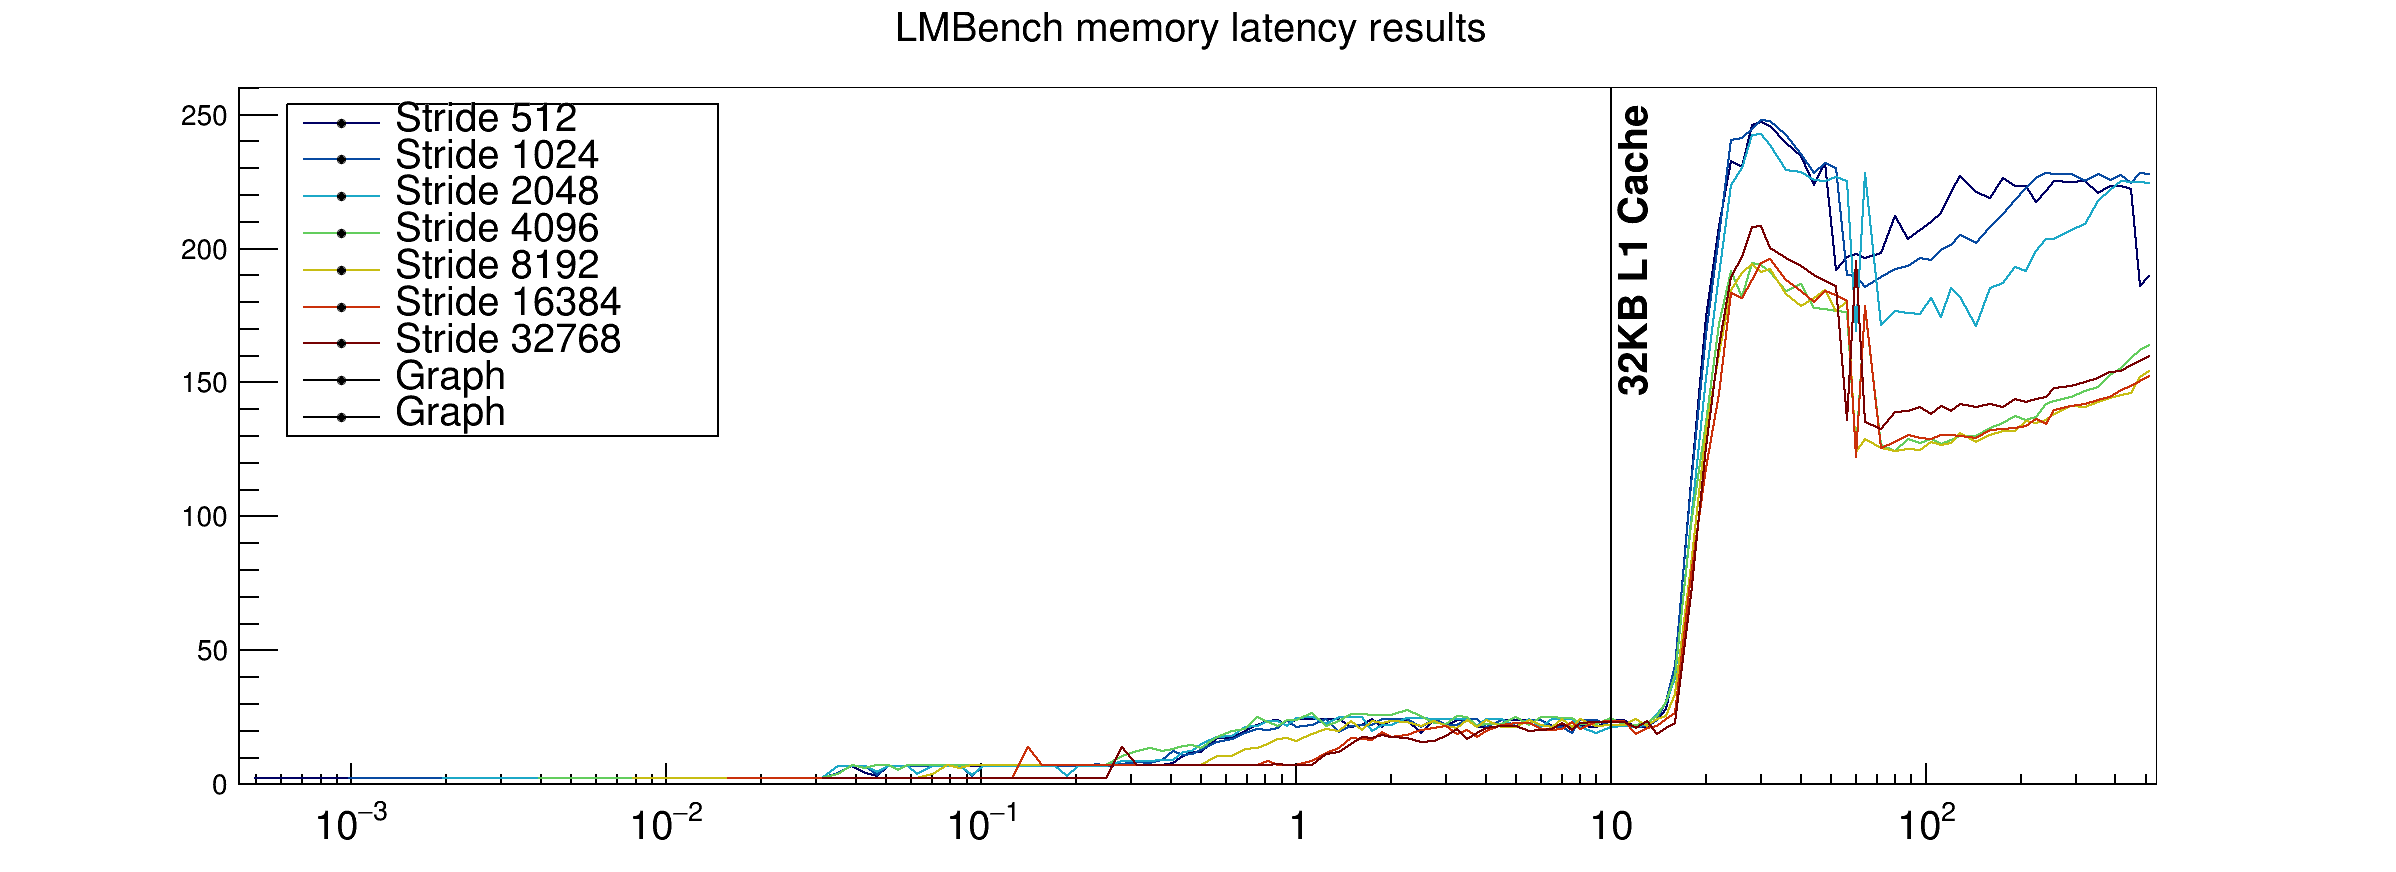

In [56]:
%jsroot off

c = ROOT.TCanvas("c1", title)
# c.SetRightMargin(0.32)
# c.SetBottomMargin(0.33)

mg = ROOT.TMultiGraph()
l = ROOT.TLegend(0.7, 0.58, 0.83, 0.9)
ROOT.gStyle.SetPalette(ROOT.kRainbow);
for k,v in sizes.items():
    lmbench_graph = ROOT.TGraph(len(v), np.array(v), np.array(latencies[k]))
    lmbench_graph.SetTitle(f"Stride {k}")
    mg.Add(lmbench_graph, "")

hmax = 290
l1 =  ROOT.TGraph(2, np.array([10,10], dtype=np.int32), np.array([0, hmax], dtype=np.int32))
t1 = ROOT.TText(13, hmax/2, "32KB L1 Cache")
t1.SetTextAngle(90)
l2 =  ROOT.TGraph(2, np.array([10,10], dtype=np.int32), np.array([0, hmax], dtype=np.int32))
# l3 = ROOT.TGraph(2, np.array(v), np.array(latencies[k]))
title="LMBench memory latency results"
mg.SetTitle(title)

xaxis = lmbench_graph.GetXaxis()
xaxis.SetTitle("Bin")
# xaxis.SetNoExponent(ROOT.kTRUE)
yaxis = lmbench_graph.GetYaxis()
yaxis.SetTitle(f"Latency (ns)")
yaxis.SetRangeUser(0, hmax)
lmbench_graph.GetHistogram().SetMinimum(0);
lmbench_graph.GetHistogram().SetMaximum(hmax)
yaxis.SetLimits(0, hmax)

lmbench_graph.Draw("A")
mg.Draw("PLC L SAME")
l1.Draw("L SAME")
l2.Draw("L SAME")
t1.Draw("")

c.Modified();
# c.Update();
c.SetLogx()
c.BuildLegend(0.12,0.5,0.3,0.88)
c.Draw()

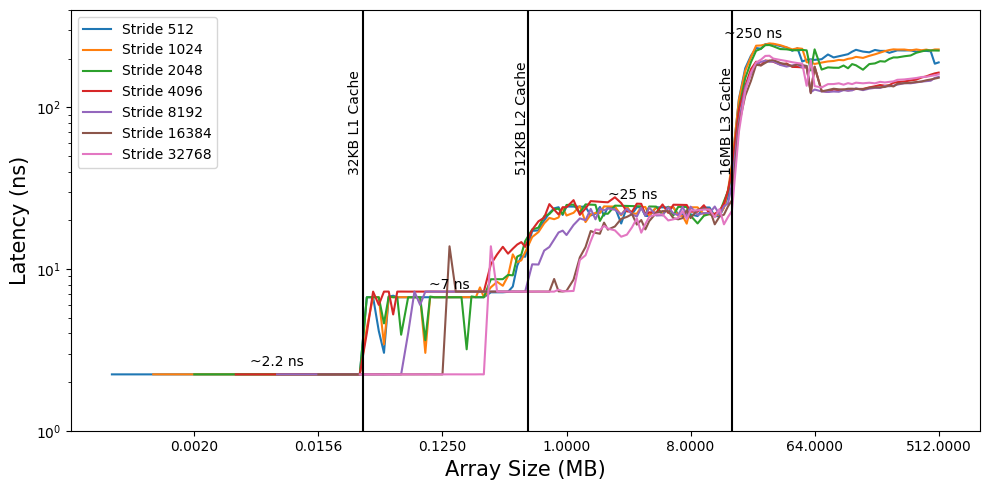

In [57]:
plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
for k,v in sizes.items():
    plt.plot(v, latencies[k], label=f"Stride {k}")

hmax = 400
div = 10
plt.vlines(0.032768, ymin=0, ymax=hmax, color="k" )
plt.text(0.032768 - 0.007, hmax/div, "32KB L1 Cache", rotation=90)
plt.vlines(0.524288, ymin=0, ymax=hmax, color="k" )
plt.text(0.524288 - 0.1, hmax/div, "512KB L2 Cache", rotation=90)
plt.vlines(16, ymin=0, ymax=hmax, color="k" )
plt.text(16 - 3, hmax/div, "16MB L3 Cache", rotation=90)

offset=0.5
hlx=0.005
# plt.hlines(2.2, xmin=0, xmax=32, color="gray")
plt.text(hlx, 2.5, "~2.2 ns")
# plt.hlines(7, xmin=0, xmax=32, color="gray")
plt.text(0.1, 7 + offset, "~7 ns")
# plt.hlines(25, xmin=0, xmax=32, color="gray")
plt.text(2, 25 + 2, "~25 ns")
# plt.hlines(250, xmin=0, xmax=32, color="gray")
plt.text(14, 250 + 20, "~250 ns")

plt.xlabel("Array Size (MB)")
plt.ylabel("Latency (ns)")
plt.legend()
plt.xscale("log", base=2)
plt.yscale("log")
plt.ylim([1, hmax])
# plt.xlim([0.0005, 32])
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%.4f"))
# plt.ticklabel_format(axis='x', style='plain')

# plt.grid()
# plt.title("LMBench results of memory read latency with different strides and array sizes on ")
plt.tight_layout()
plt.savefig("lmbench_das6.pdf",format="pdf")
plt.show()

In [41]:
T_l1 = 2.2
T_l2 = 7
T_l3 = 25
T_mem = 250

l1_size = 32768
l2_size = 524288
l3_size = 67108864

In [42]:
def T_bs(num_bytes):
    return min(num_bytes, l1_size) * T_l1

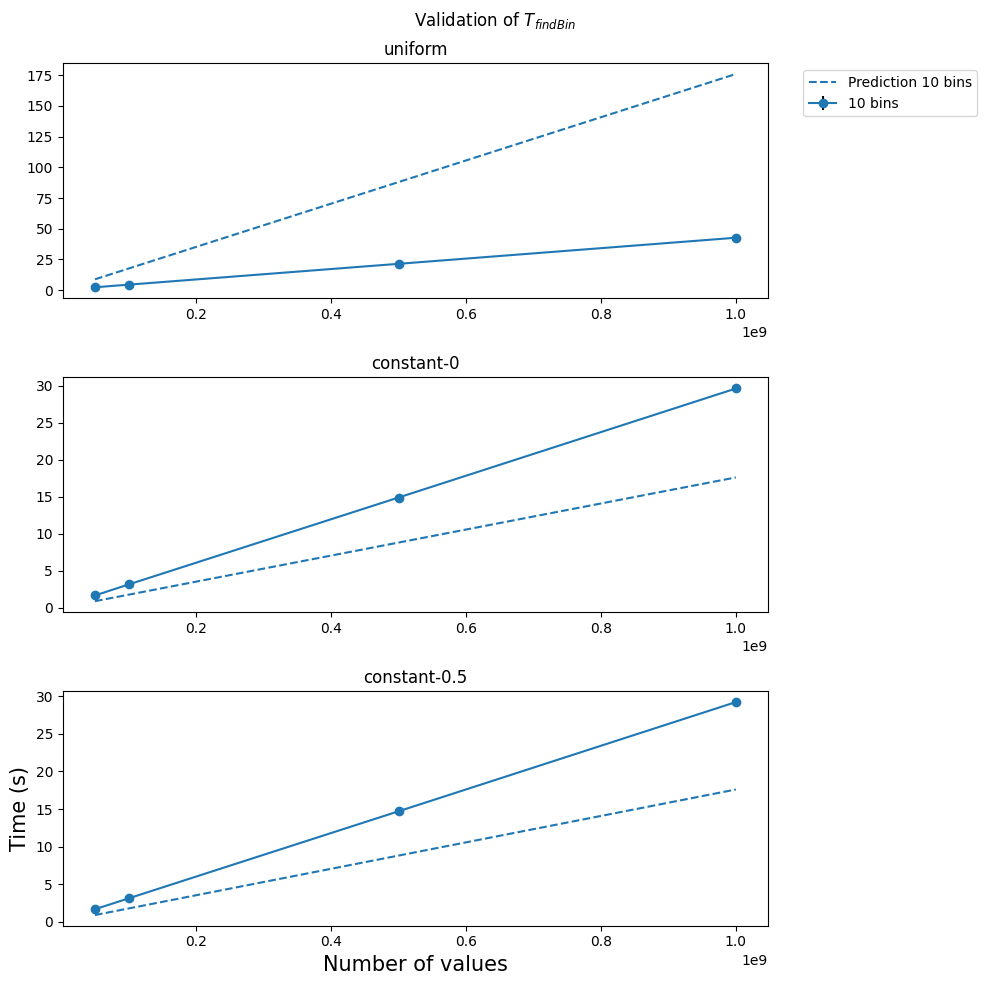

In [43]:
plt.figure(figsize=(10,10))
plt.suptitle("Validation of $T_{findBin}$")

# distr = unique_distribution[0]

for di,distr in enumerate(unique_distribution):
    plt.subplot(3,1,di+1)
    plt.title(distr)
    nb = 1000
    edges = True
    bulksize = 32768
    for nb in unique_nbins[1:-2]:
        p = plt.errorbar(unique_nvals, gp_vd.mean().loc["CPU", distr, :, nb, bulksize, edges]["tfindbin"], 
                     yerr=gp_vd.std().loc["CPU", distr, :, nb, bulksize, edges]["tfindbin"], 
                     marker="o", ecolor="k", 
                     label=f"{int(nb)} bin{'s' if int(nb) > 1 else ''}"
                     # label=f"{distr}"
                    )
        
        if distr == "uniform":
            plt.plot(unique_nvals, np.repeat(T_bs(nb * 8)/1e9, len(unique_nvals)) * unique_nvals, c=p[0].get_color(),
                     ls="--", label=f"Prediction {int(nb)} bin{'s' if int(nb) > 1 else ''}")
        elif "constant" in distr:
            plt.plot(unique_nvals, np.repeat(T_bs(8)/1e9, len(unique_nvals)) * unique_nvals, c=p[0].get_color(),
                     ls="--", label=f"Prediction {int(nb)} bin{'s' if int(nb) > 1 else ''}")
            
    if di == 0:
        plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

plt.xlabel("Number of values")
plt.ylabel("Time (s)")
plt.tight_layout()

### sequential 

In [44]:
def search_distance(arr, x):
    count = len(arr)
    first = 0

    dist = 0
    while (count > 0):
      it = first
      step = int(count / 2);
      it += step;
    
      if (arr[it] < x):
         first = it + 1
         count -= step + 1;
      else:
         count = step;
      dist += 1
    return dist

In [45]:
filename = "binsearch.json" 
with open(filename, "r") as f:
    jdata = json.load(f)
df = pd.DataFrame.from_dict(jdata["benchmarks"]).astype({"real_time" : float})
df["param"] = df["name"].apply(lambda s: float(s.split("/")[1]))
df["distance"] = df["param"].apply(lambda s: search_distance(np.linspace(0,1,1000), s))
df["func_name"] = df["name"].apply(lambda s: s.split("/")[0][3:])
bs_df = df[df["func_name"] == "BinarySearch"]
bs_df

,name,family_index,per_family_instance_index,run_name,run_type,repetitions,repetition_index,threads,iterations,real_time,cpu_time,time_unit,param,distance,func_name
0,BM_BinarySearch/1/manual_time,0,0,BM_BinarySearch/1/manual_time,iteration,1,0,1,156,4.551525,4.546999,ms,1.0,10,BinarySearch
1,BM_BinarySearch/2/manual_time,0,1,BM_BinarySearch/2/manual_time,iteration,1,0,1,139,5.054828,5.054439,ms,2.0,9,BinarySearch
2,BM_BinarySearch/3/manual_time,0,2,BM_BinarySearch/3/manual_time,iteration,1,0,1,162,4.251436,4.246140,ms,3.0,9,BinarySearch
3,BM_BinarySearch/4/manual_time,0,3,BM_BinarySearch/4/manual_time,iteration,1,0,1,133,5.065160,5.059299,ms,4.0,9,BinarySearch
4,BM_BinarySearch/5/manual_time,0,4,BM_BinarySearch/5/manual_time,iteration,1,0,1,157,4.432735,4.422897,ms,5.0,9,BinarySearch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,BM_BinarySearch/96/manual_time,0,95,BM_BinarySearch/96/manual_time,iteration,1,0,1,149,4.628474,4.628069,ms,96.0,9,BinarySearch
96,BM_BinarySearch/97/manual_time,0,96,BM_BinarySearch/97/manual_time,iteration,1,0,1,171,4.062870,4.062653,ms,97.0,9,BinarySearch
97,BM_BinarySearch/98/manual_time,0,97,BM_BinarySearch/98/manual_time,iteration,1,0,1,146,4.853625,4.853160,ms,98.0,9,BinarySearch
98,BM_BinarySearch/99/manual_time,0,98,BM_BinarySearch/99/manual_time,iteration,1,0,1,147,4.781845,4.781564,ms,99.0,9,BinarySearch


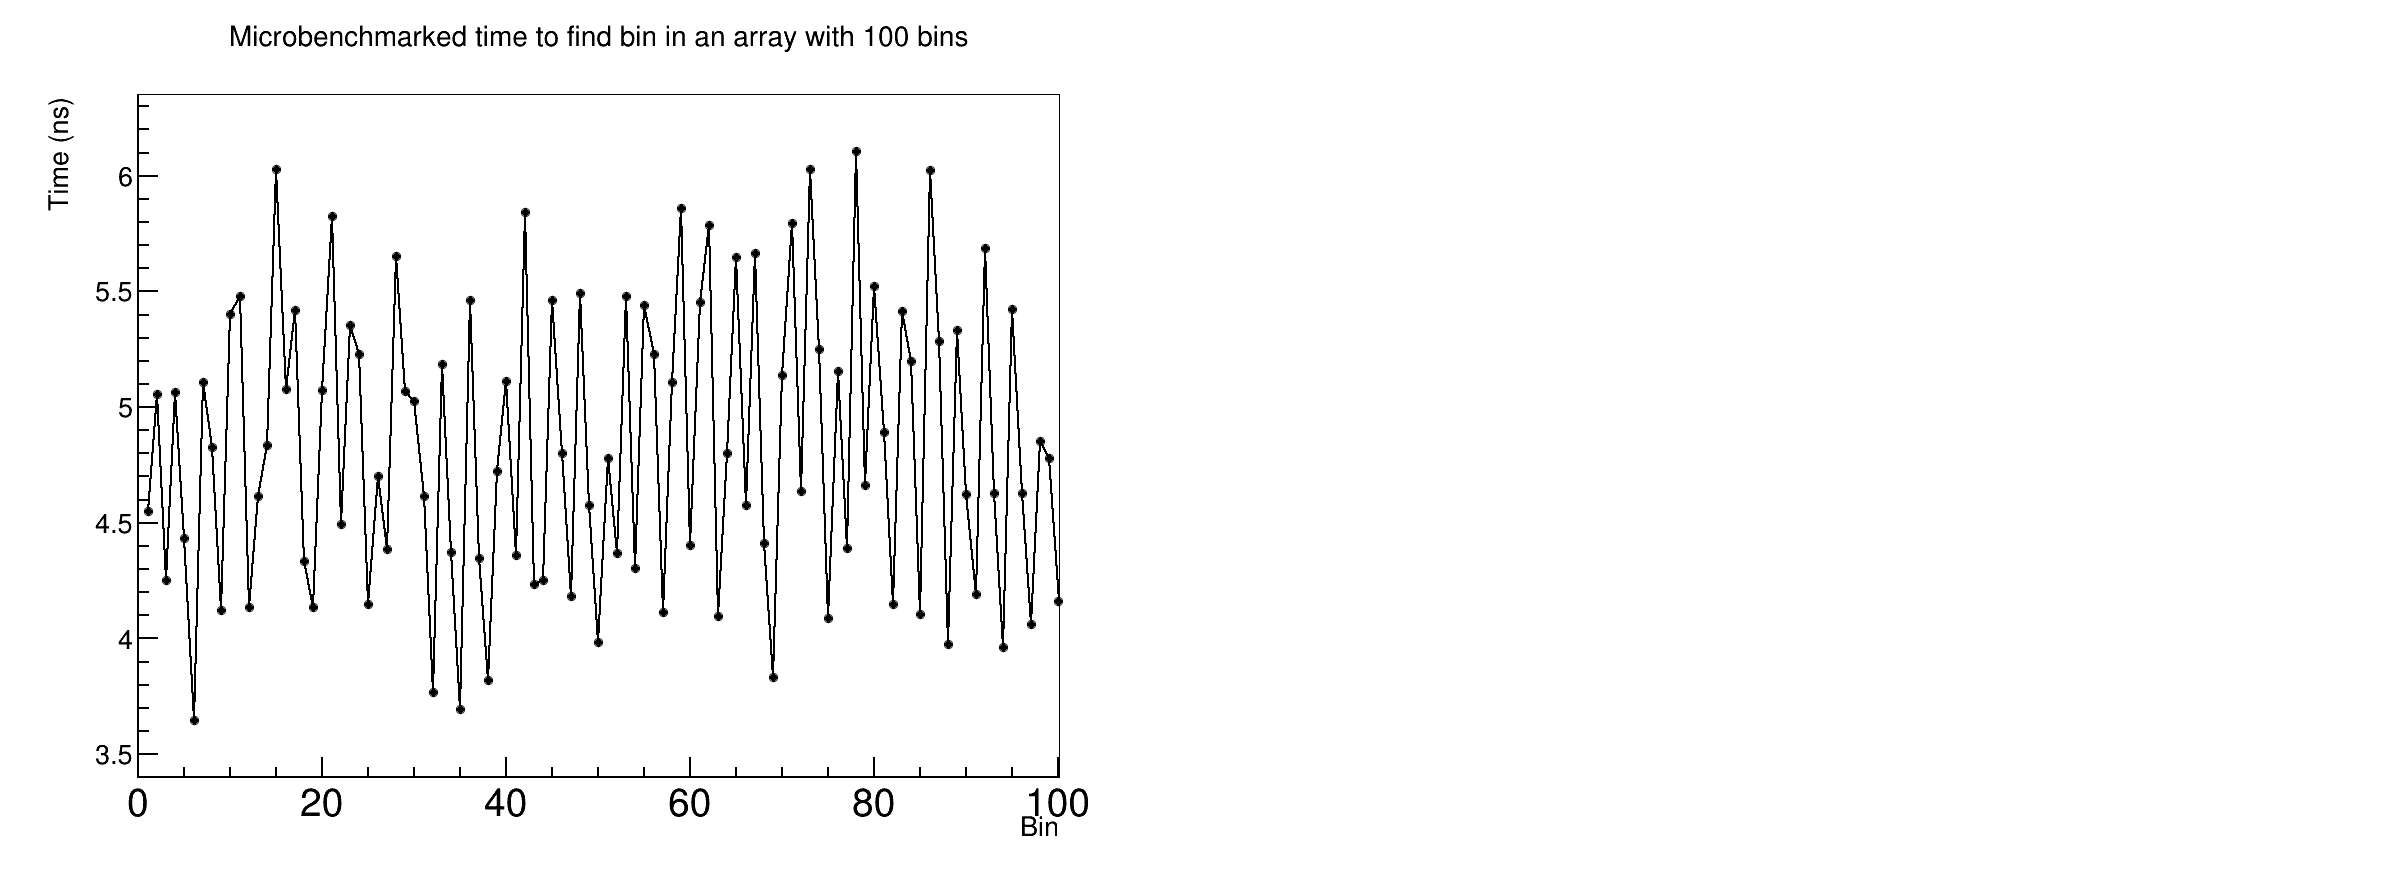

In [46]:
c = ROOT.TCanvas("c1", title)
c.SetRightMargin(0.32)
c.SetBottomMargin(0.33)
c.Divide(2,1)

l = ROOT.TLegend(0.7, 0.7, 0.96, 0.9)
l.SetTextSize(0.05)

g = ROOT.TGraph(len(bs_df["param"]), bs_df["param"].values, bs_df["real_time"].values)
g.SetMarkerSize(1)
g.SetMarkerStyle(8)
l.AddEntry(g, "Microbenchmark", "p")
xaxis = g.GetXaxis()
xaxis.SetTitle("Bin")
yaxis = g.GetYaxis()
yaxis.SetTitle(f"Time (ns)")
xaxis.SetRangeUser(0, 100)

c.cd(1)
g.Draw("ALP")

title="Microbenchmarked time to find bin in an array with 100 bins"
g.SetTitle(title)

# l.Draw()
c.Draw()
# ROOT.gPad.Modified(); ROOT.gPad.Update()

In [47]:
bs_df["real_time"].mean() * 500000000 / 1e9, gp_bm.mean().loc["CPU", "uniform", 500000000, 100, 1]["tfindbin"]

NameError: name 'gp_bm' is not defined

### Uniform random

In [ ]:
bs_df = df[df["func_name"] == "BinarySearch"]
bs_df

In [ ]:
%jsroot off
def f_bs_log(x, p):
    """
    Binary Search
    """
    return p[0] * np.log2(x[0]) +  p[1]

def f_bs_polynomial(x, p):
    """
    Binary Search
    """
    return p[0] * x[0]**(p[1]) + p[2]

title="Model Update Stats Bulk"
w = 1600
h = 900
c = ROOT.TCanvas("c1", title, w, h)
c.SetRightMargin(0.32)
c.SetBottomMargin(0.33)

l = ROOT.TLegend(0.7, 0.7, 0.96, 0.9)
l.SetTextSize(0.05)

model_bs_log = ROOT.TF1("f_bs_log", f_bs_log, bs_df["param"].min(), bs_df["param"].max(), 2)
fit_log = g.Fit(model_bs_log, "", "", 10e-3, 40e4)
l.AddEntry(model_bs_log, "Logarithmic Fit")

model_bs_poly = ROOT.TF1("f_bs_polynomial", f_bs_polynomial, bs_df["param"].min(), bs_df["param"].max(), 3)
fit_poly = g.Fit(model_bs_poly, "", "", 10e-3, 40e4)
l.AddEntry(model_bs_poly, "Polynomial Fit")
model_bs_poly.SetLineColor(ROOT.kBlue)

g = ROOT.TGraph(len(bs_df["param"]), bs_df["param"].values, bs_df["real_time"].values)
g.SetMarkerSize(1)
g.SetMarkerStyle(8)
l.AddEntry(g, "Microbenchmark", "p")

xaxis = model_bs_log.GetXaxis()
xaxis.SetTitle("Number of bins")
# xaxis.SetTitleOffset(3)
xaxis.SetTitleSize(0.05)
xaxis.SetTickSize(0)
xaxis.SetLabelSize(0.05)
xaxis.LabelsOption("vM")
xaxis.SetRangeUser(0, 5*10e3)

yaxis = model_bs_log.GetYaxis()
yaxis.SetTitle(f"Time ({list(bs_df['time_unit'])[0]}")
yaxis.SetTitleSize(0.05)
yaxis.SetLabelSize(0.05)
# yaxis.SetRangeUser(0, 0.4)


model_bs_log.Draw("C")
model_bs_poly.Draw("CSAME")
g.Draw("PSAME")

title="Calibration of T_{bs}"
model_bs_log.SetTitle(title)

l.Draw()
c.Draw()
# ROOT.gPad.Modified(); ROOT.gPad.Update()

## Histogram Fill

In [ ]:
fb_df = bm_df[bm_df["func_name"] == "Histogram"]
fb_df.head(5)

In [ ]:
# ROOT Plot
def f_fb(fixed, bulksize):
    if fixed:
        return bulksize * (T_alg1_16 + T_alg1_23)
    return bulksize * (T_alg1_18 + T_alg1_23)

w = 1600
h = 900
c = ROOT.TCanvas("c1", title, w, h)
c.SetRightMargin(0.32)
c.SetBottomMargin(0.33)

l = ROOT.TLegend(0.7, 0.7, 0.96, 0.9)
l.SetTextSize(0.05)

# model_fb = ROOT.TF1("f_bs", f_bs, fb_df["param"].min(), fb_df["param"].max(), 3)
# fit = g.Fit(model_fb, "", "", 10e-3, 40e4)
# l.AddEntry(model_fb, "Fit")

g = ROOT.TGraph(len(fb_df["param"]), fb_df["param"].values, fb_df["real_time"].values)
g.SetMarkerSize(1)
g.SetMarkerStyle(8)
l.AddEntry(g, "Microbenchmark", "p")

xaxis = g.GetXaxis()
xaxis.SetTitle("Number of bins")
# xaxis.SetTitleOffset(3)
xaxis.SetTitleSize(0.05)
xaxis.SetTickSize(0)
xaxis.SetLabelSize(0.05)
xaxis.LabelsOption("vM")
xaxis.SetRangeUser(0, 5*10e3)

yaxis = g.GetYaxis()
yaxis.SetTitle(f"Time ({list(bs_df['time_unit'])[0]}")
yaxis.SetTitleSize(0.05)
yaxis.SetLabelSize(0.05)
# yaxis.SetRangeUser(0, 0.4)


# model_bs.Draw("C")
g.Draw("APSAME")

# title="Calibration of T_{bs}"
# model_bs.SetTitle(title)

l.Draw()
c.Draw()
# ROOT.gPad.Modified(); ROOT.gPad.Update()

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Validation of $T_{fill}$")
plt.subplot(111)

nb = 1000
# for nb in unique_nbins:
lines = []
for distr in unique_distribution:
    p = plt.errorbar(unique_nvals, gp_vd.mean().loc["CPU", distr, :, nb, 32768, False]["tfill"], 
                 yerr=gp_vd.std().loc["CPU", distr, :, nb, 32768, False]["tfill"], 
                 marker="o", ecolor="k", 
                 # label=f"{distr} bin{'s' if int(nb) > 1 else ''}"
                 label=f"{distr}"
                )
    lines.append(p)

plt.plot(unique_nvals, np.repeat(T_l1/1e9, len(unique_nvals)) * unique_nvals, ls="--", label="Prediction L1")
plt.plot(unique_nvals, np.repeat(T_l2/1e9, len(unique_nvals)) * unique_nvals, ls="--",label="Prediction L2")
plt.plot(unique_nvals, np.repeat(T_l3/1e9, len(unique_nvals)) * unique_nvals, ls="--",label="Prediction L3")
plt.plot(unique_nvals, np.repeat(T_mem/1e9, len(unique_nvals)) * unique_nvals, ls="--",label="Prediction Mem")

plt.xlabel("Number of values")
plt.ylabel("Time (s)")
plt.legend()

# Other Overhead

In [ ]:
selected_env = "CPU" 
selected_bulksize = 32768
selected_bins = 100
selected_nvals = unique_nvals
selected_distr = "uniform"
selected_edges = True

In [ ]:
for distr in unique_distribution:
    tfill_avg = gp_vd.mean().loc[selected_env, distr, :, nb, selected_bulksize, selected_edges]["tfill"]
    tfill_std = gp_vd.std().loc[selected_env, distr, :, nb, selected_bulksize, selected_edges]["tfill"]
    # p = plt.errorbar(unique_nvals, tfill_avg, yerr=tfill_std, 
    #          marker="o", ecolor="k", 
    #          # label=f"{distr} bin{'s' if int(nb) > 1 else ''}"
    #          label=f"{distr}"
    #         )
    
    tusb_avg = gp_vd.mean().loc[selected_env, distr, :, nb, selected_bulksize, selected_edges]["tstats"]
    tusb_std = gp_vd.std().loc[selected_env, distr, :, nb, selected_bulksize, selected_edges]["tstats"]
    # p = plt.errorbar(unique_nvals, tusb_avg, yerr=tusb_std, 
    #          marker="o", ecolor="k", 
    #          # label=f"{distr} bin{'s' if int(nb) > 1 else ''}"
    #          label=f"{distr}"
    #         )

    ttotal_avg = gp_vd.mean().loc[selected_env, distr, :, nb, selected_bulksize, selected_edges]["ttotal"]
    ttotal_std = gp_vd.std().loc[selected_env, distr, :, nb, selected_bulksize, selected_edges]["ttotal"]
    p = plt.errorbar(unique_nvals, ttotal_avg, yerr=ttotal_std, 
                 marker="o", ecolor="k", 
                 # label=f"{distr} bin{'s' if int(nb) > 1 else ''}"
                 label=f"{distr} total"
                )

    tfindbin_avg = gp_vd.mean().loc[selected_env, distr, :, nb, selected_bulksize, selected_edges]["tfindbin"]
    tfindbin_std = gp_vd.std().loc[selected_env, distr, :, nb, selected_bulksize, selected_edges]["tfindbin"]
    p = plt.errorbar(unique_nvals, tfill_avg + tusb_avg + tfindbin_avg, yerr=tfill_std + tusb_std + tfindbin_std, 
                 marker="o", ecolor="k", color=p[0].get_color(), alpha=0.3,
                 # label=f"{distr} bin{'s' if int(nb) > 1 else ''}"
                 label=f"{distr} summed parts"
                )

    
    lines.append(p)

plt.legend()
plt.xlabel("Number of values")
plt.ylabel("Time (s)")